In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_csv('/content/fire_archive.csv')

In [3]:
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [4]:
data.shape

(36011, 15)

In [5]:
data.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

<Axes: >

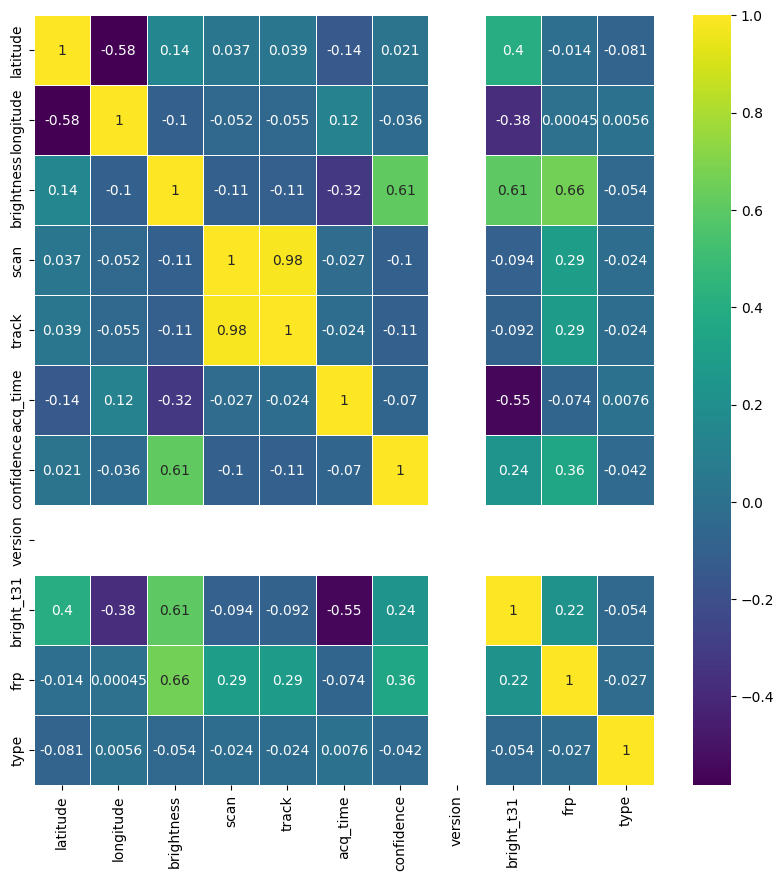

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='viridis',linewidths=.5)

In [7]:
data = data.drop(['instrument', 'version'], axis = 1)

data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,48,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,71,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,42,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,33,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,36,298.8,27.6,D,0


In [8]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

data['daynight'] = data['daynight'].map(daynight_map)
data['satellite'] = data['satellite'].map(satellite_map)

data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,1,71,297.3,11.3,1,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,1,42,298.7,23.1,1,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,1,36,298.8,27.6,1,0


In [9]:
data.describe()

,latitude,longitude,brightness,scan,track,acq_time,satellite,confidence,bright_t31,frp,daynight,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,0.429591,67.551387,301.339138,51.132176,0.783177,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,0.495025,23.179946,9.724462,92.280112,0.412087,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,267.000000,0.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,0.000000,52.000000,293.600000,13.800000,1.000000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,0.000000,70.000000,302.400000,25.800000,1.000000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,1.000000,86.000000,308.600000,52.800000,1.000000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,1.000000,100.000000,400.100000,3679.500000,1.000000,3.000000


In [10]:
types = pd.get_dummies(data['type'],dtype='int')
data = pd.concat([data, types], axis=1)

data = data.drop(['type'], axis = 1)
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0,2,3
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,1,42,298.7,23.1,1,1,0,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,1,36,298.8,27.6,1,1,0,0


In [11]:
data = data.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})